<a href="https://colab.research.google.com/github/skywalker0803r/telegram-investment-advice-bot/blob/main/%E7%B0%A1%E5%96%AESMA%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#!pip install yfinance
#!pip install finta

In [38]:
import yfinance as yf
import numpy as np
import pandas as pd
import keras
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from finta import TA
from tqdm import tqdm
# 下載台灣加權指數資料
ticker = '^TWII'
start_date = '2018-01-01'#從訓練資料沒有包括的時間開始做回測
end_date = '2023-02-26'#設置回測結束日期
df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10664.820312,10710.730469,10650.769531,10710.730469,10710.730469,2375900
2018-01-03,10759.610352,10813.160156,10759.610352,10801.570312,10801.570312,2964800
2018-01-04,10834.580078,10853.459961,10794.250000,10848.629883,10848.629883,3048500
2018-01-05,10856.919922,10879.799805,10815.679688,10879.799805,10879.799805,3028400
2018-01-08,10899.089844,10918.469727,10869.120117,10915.750000,10915.750000,3246900
...,...,...,...,...,...,...
2023-02-20,15452.009766,15575.320312,15436.660156,15551.230469,15551.230469,2994900
2023-02-21,15535.639648,15567.740234,15496.730469,15563.000000,15563.000000,2997300
2023-02-22,15541.169922,15541.169922,15345.929688,15418.769531,15418.769531,2881300


In [39]:
def calculate_ta(df):
    ta_functions = [TA.RSI, TA.WILLIAMS, TA.SMA, TA.EMA, TA.WMA, TA.HMA, TA.TEMA, TA.CCI, TA.CMO, TA.MACD, TA.PPO, TA.ROC, TA.CFI, TA.DMI, TA.SAR]
    ta_names = ['RSI', 'Williams %R', 'SMA', 'EMA', 'WMA', 'HMA', 'TEMA', 'CCI', 'CMO', 'MACD', 'PPO', 'ROC', 'CFI', 'DMI', 'SAR']
    for i, ta_func in enumerate(ta_functions):
        try:
            df[ta_names[i]] = ta_func(df)
        except:
            if ta_names[i] == 'MACD':
                df[ta_names[i]] = ta_func(df)['MACD']-ta_func(df)['SIGNAL']
            if ta_names[i] == 'PPO':
                df[ta_names[i]] = ta_func(df)['PPO']-ta_func(df)['SIGNAL']  
            if ta_names[i] == 'DMI':
                df[ta_names[i]] = ta_func(df)['DI+']-ta_func(df)['DI-']
    return df

In [40]:
def process(df):
    # 特徵工程
    df = calculate_ta(df)
    df = df.dropna(axis=0)
    df = df[['SMA','Close']]
    df['SIGNAL'] = 0
    SMA5 = df['SMA'].rolling(5).mean()
    SMA20 = df['SMA'].rolling(20).mean()
    cond1 = (SMA5 > SMA20)&(SMA5.shift(-1) < SMA20.shift(-1))
    cond2 = (SMA5 < SMA20)&(SMA5.shift(-1) > SMA20.shift(-1))
    df.loc[cond1,'SIGNAL'] = 2 # sell
    df.loc[cond2,'SIGNAL'] = 1 # buy
    buy = df[df['SIGNAL']==1]['Close']
    sell = df[df['SIGNAL']==2]['Close']
    df['Close'].plot()
    plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
    plt.title('BUY SIGNAL')
    plt.show()
    df['Close'].plot()
    plt.scatter(list(sell.index),list(sell.values),color='green',marker='v')
    plt.title('SELL SIGNAL')
    plt.show()
    return df['SIGNAL'].values.tolist()

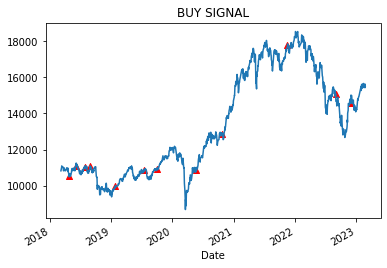

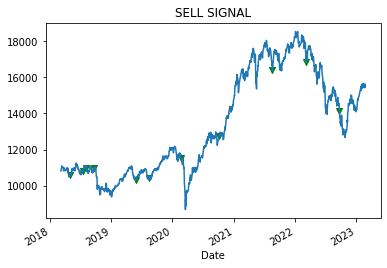

買入時間: 2018-02-22 00:00:00
買入價格: 10662.3798828125
賣出時間: 2018-03-01 00:00:00
賣出價格: 10785.7900390625
獲利: 11477.14453125
買入時間: 2018-04-09 00:00:00
買入價格: 10893.5302734375
賣出時間: 2018-04-25 00:00:00
賣出價格: 10559.9697265625
獲利: -30687.5703125
買入時間: 2018-06-04 00:00:00
買入價格: 11109.5
賣出時間: 2018-06-11 00:00:00
賣出價格: 11149.23046875
獲利: 3496.28125
買入時間: 2018-07-05 00:00:00
買入價格: 10611.8095703125
賣出時間: 2018-07-20 00:00:00
賣出價格: 10932.1103515625
獲利: 29467.671875
買入時間: 2018-11-28 00:00:00
買入價格: 9884.3095703125
賣出時間: 2018-12-25 00:00:00
賣出價格: 9527.08984375
獲利: -36436.412109375
買入時間: 2019-05-20 00:00:00
買入價格: 10398.41015625
賣出時間: 2019-06-18 00:00:00
賣出價格: 10566.740234375
獲利: 15654.697265625
買入時間: 2019-08-01 00:00:00
買入價格: 10731.75
賣出時間: 2019-08-06 00:00:00
賣出價格: 10394.75
獲利: -31004.0
買入時間: 2020-03-19 00:00:00
買入價格: 8681.33984375
賣出時間: 2020-03-20 00:00:00
賣出價格: 9234.08984375
獲利: 60802.5
買入時間: 2020-08-21 00:00:00
買入價格: 12607.83984375
賣出時間: 2020-09-18 00:00:00
賣出價格: 12875.6201171875
獲利: 21690.2021484375
買入時

In [41]:
signals = process(df)
capital = 1000000  # 初始資本
hold = False  # 是否持有股票
entry_price = 0  # 進場價格
entry_idx = 0  # 進場時間點
exit_price = 0  # 出場價格
exit_idx = 0  # 出場時間點
t = 20
lb = 0.97
ub = 1.03
capital_history = []
for i, signal in enumerate(signals):
    if signal == 1 and not hold:  # 進場買入
        hold = True
        entry_price = df.iloc[i]['Close']
        entry_idx = i
    elif signal == 2 and hold:  # 出場賣出
        hold = False
        exit_price = df.iloc[i]['Close']
        exit_idx = i
        # 計算交易結果
        shares = capital // entry_price
        profit = shares * (exit_price - entry_price)
        capital += profit
        print('買入時間:', df.index[entry_idx])
        print('買入價格:', entry_price)
        print('賣出時間:', df.index[exit_idx])
        print('賣出價格:', exit_price)
        print('獲利:', profit)
    elif hold and (i - entry_idx >= t or df.iloc[i]['Close'] <= entry_price * lb or df.iloc[i]['Close'] >= entry_price * ub):  # 到達出場條件
        hold = False
        exit_price = df.iloc[i]['Close']
        exit_idx = i
        # 計算交易結果
        shares = capital // entry_price
        profit = shares * (exit_price - entry_price)
        capital += profit
        print('買入時間:', df.index[entry_idx])
        print('買入價格:', entry_price)
        print('賣出時間:', df.index[exit_idx])
        print('賣出價格:', exit_price)
        print('獲利:', profit)
    capital_history.append(capital)

報酬率:7.211223339843742%
最大回撤:-3.8032187500000036%


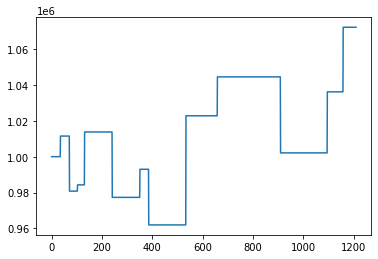

In [42]:
plt.plot(capital_history)
print(f"報酬率:{(capital_history[-1]/capital_history[0]-1)*100}%")
print(f"最大回撤:{-(1-min(capital_history)/capital_history[0])*100}%")
     